In [34]:
%reset -s -f
%run helpers.ipynb

In [35]:
import logging
import os

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro
import graphviz
import pyro.distributions as dist
import pyro.distributions.constraints as constraints

In [36]:
smoke_test = ('CI' in os.environ)
assert pyro.__version__.startswith('1.8.4')

pyro.enable_validation(True)
pyro.set_rng_seed(1)
logging.basicConfig(format='%(message)s', level=logging.INFO)

# Set matplotlib settings
%matplotlib inline
plt.style.use('default')

In [ ]:
# Read in, from training set: 
# obs_data
# mask
# sample_means
# drug_means

In [39]:
pyro.render_model(model, model_args=(obs_data, mask, sample_means, drug_means), render_distributions=True)

NameError: name 'helpers' is not defined

In [30]:
pyro.clear_param_store()
kernel = pyro.infer.mcmc.NUTS(model, jit_compile=True)
mcmc = pyro.infer.MCMC(kernel, num_samples=500, warmup_steps=500)
mcmc.run(obs_data, mask, sample_means, drug_means)

Warmup:   0%|                                            | 0/1000 [00:00, ?it/s]/var/folders/qp/_x0hhd1j55x6rc8v_jztj07c0000gn/T/ipykernel_12917/39124555.py:20: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  obs=obs_data[i,j] if mask[i,j] else None)
/var/folders/qp/_x0hhd1j55x6rc8v_jztj07c0000gn/T/ipykernel_12917/39124555.py:20: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  obs=obs_data[i,j] if mask[i,j] else None)
/var/folders/qp/_x0hhd1j55x6rc8v_jztj07c0000gn/T/ipykernel_12917/39124555.py:20: TracerWarning: Converting a tensor to a Python boolean migh

In [31]:
mcmc_samples = {k: v.detach().cpu().numpy() for k, v in mcmc.get_samples().items()}

Text(0.5, 0, 'd1')

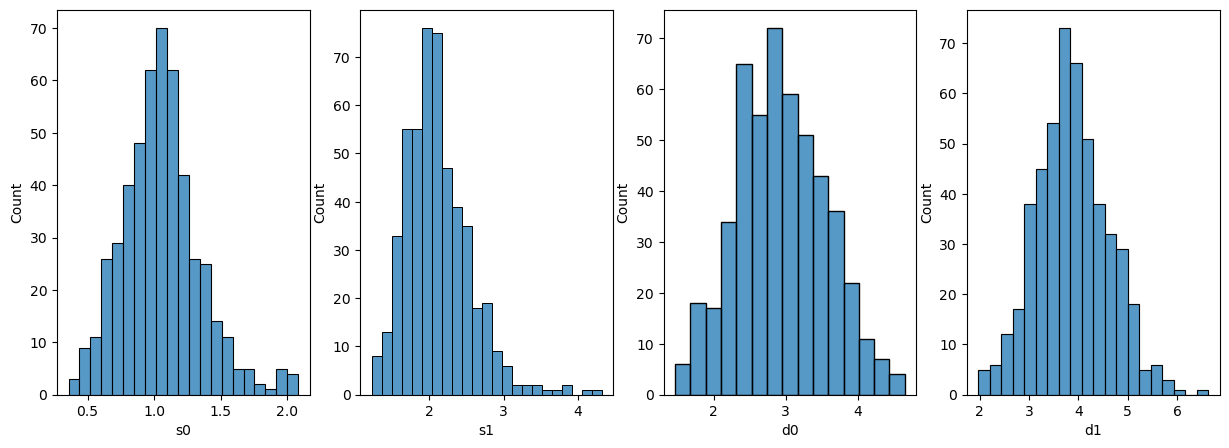

In [32]:
# TODO: Edit this code to figure out how to analyze data output

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.histplot(mcmc_samples['s0'], ax=axes[0])
axes[0].set_xlabel('s0')

sns.histplot(mcmc_samples['s1'], ax=axes[1])
axes[1].set_xlabel('s1')

sns.histplot(mcmc_samples['d0'], ax=axes[2])
axes[2].set_xlabel('d0')

sns.histplot(mcmc_samples['d1'], ax=axes[3])
axes[3].set_xlabel('d1')